In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import PolynomialFeatures

Text(0, 0.5, 'y')

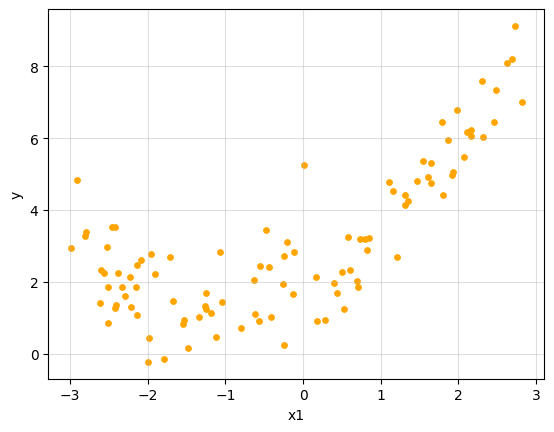

In [2]:
m = 100
#non-linear data
x1 = 6 * np.random.rand(m,1) - 3 #vector 1x100
y = 0.5 * x1**2 + x1 + 2 + np.random.randn(m,1) #normal distibuition 

plt.scatter(x1,y,c="orange",s=15)
plt.grid(alpha=0.4)
plt.xlabel("x1")
plt.ylabel("y")

In [3]:
#polynomial features

poly_transform=PolynomialFeatures(degree=2,include_bias=False)
x1_poly=poly_transform.fit_transform(x1)
#y_poly = 0.5 * x1_poly**2 + x1_poly + 2 + np.random.randn(m,1)

print(x1[0],x1_poly[0])


[1.15810668] [1.15810668 1.34121109]


we basically apply a square on each feature using:
X + features**2

In [4]:
#using a linear model:
from sklearn.linear_model import LinearRegression

lin_regression=LinearRegression()
lin_regression.fit(x1_poly[:],y) #x plus its polinomial features

l2=LinearRegression()
l2.fit(x1,y)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


Text(0, 0.5, 'y')

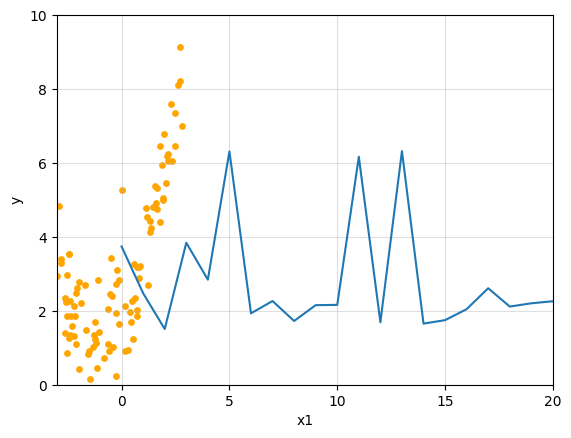

In [5]:

y_poly_predict = lin_regression.predict(x1_poly)
y2=l2.predict(x1)


plt.scatter(x1,y,c="orange",s=15)
plt.plot(y_poly_predict)
plt.axis([-3,20,0,10])
plt.grid(alpha=0.4)
plt.xlabel("x1")
plt.ylabel("y")

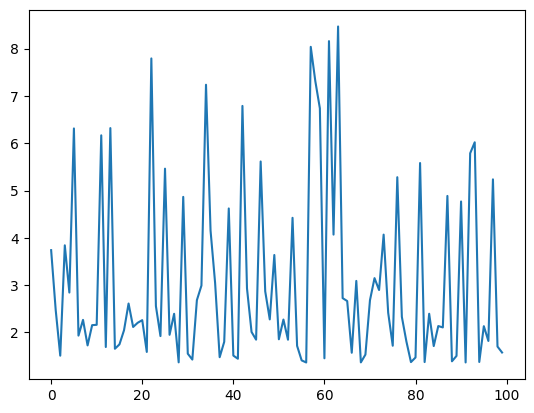

In [6]:
plt.plot(y_poly_predict)

Other degrees:




Text(0, 0.5, 'y')

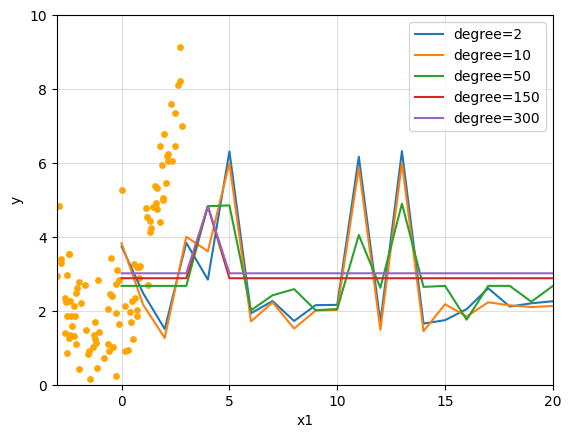

In [7]:
poly_transform2=PolynomialFeatures(degree=10,include_bias=False)
poly_transform3=PolynomialFeatures(degree=50,include_bias=False)
poly_transform4=PolynomialFeatures(degree=150,include_bias=False)
poly_transform5=PolynomialFeatures(degree=300,include_bias=False)

lin_regression2=LinearRegression()
x2=poly_transform2.fit_transform(x1)
y2=lin_regression2.fit(x2,y)
y22=lin_regression2.predict(x2)

lin_regression3=LinearRegression()
x3=poly_transform3.fit_transform(x1)
y3=lin_regression3.fit(x3,y)
y33=lin_regression3.predict(x3)

lin_regression4=LinearRegression()
x4=poly_transform4.fit_transform(x1)
y4=lin_regression4.fit(x4,y)
y44=lin_regression4.predict(x4)

lin_regression5=LinearRegression()
x5=poly_transform5.fit_transform(x1)
y5=lin_regression5.fit(x5,y)
y55=lin_regression5.predict(x5)

plt.scatter(x1,y,c="orange",s=15)

plt.plot(y_poly_predict,label='degree=2')
plt.plot(y22,label='degree=10')
plt.plot(y33,label='degree=50')
plt.plot(y44,label='degree=150')
plt.plot(y55,label='degree=300')


plt.axis([-3,20,0,10])
plt.legend()
plt.grid(alpha=0.4)
plt.xlabel("x1")
plt.ylabel("y")

Best: degree=2~50

Another way to see how good the model peforms is ploting his leaning curves.
Leaning curves consists in compare model RMSE with different train set sizes.

Let's see it with a Polynomial degree=10 and a Normal Linear Regression:


In [8]:
def learning_curves(model,X,y):

    x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
    train_errors,test_errors=[],[]

    for m in range(1,len(x_train)):
        model.fit(x_train[:m],y_train[:m])
        y_train_predict=model.predict(x_train[:m])
        y_test_predict=model.predict(x_test)

        test_errors.append(mean_squared_error(y_train[:m],y_train_predict))
        train_errors.append(mean_squared_error(y_test,y_test_predict))

    plt.plot(np.sqrt(train_errors),'r-.',linewidth=2,label='train set')
    plt.plot(np.sqrt(test_errors),'b-+',linewidth=2,label='test set (generalization)')


    plt.grid(color='g',alpha=0.3)
    plt.xlabel("train size")
    plt.ylabel("RMSE")
    plt.legend()
    #plt.show()

#using a Pipeline for comapare Polynomial and Linear

from sklearn.pipeline import Pipeline

poly_model=Pipeline([
    ("poly_features",PolynomialFeatures(degree=2,include_bias=False)),
    ("linear reg",LinearRegression())
])

lg=LinearRegression()


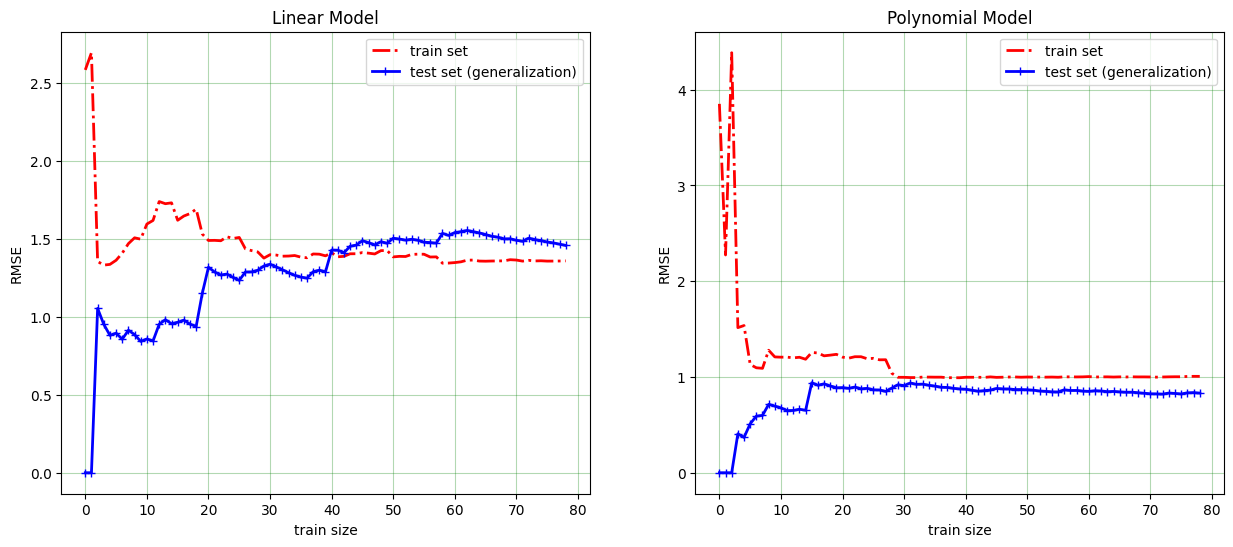

In [9]:
plt.figure(figsize=(15,6))

plt.subplot(121)
plt.title("Linear Model")
learning_curves(lg,x1,y)

plt.subplot(122)
plt.title("Polynomial Model")
learning_curves(poly_model,x1,y)

## Ridge and Lasso Models:
These models are regularized versions of **linear regression** that change feature weights.
This improve model predict and his capacity of generalization

* Ridge : Regression type that peforms using l2 norm;keep varables the same
>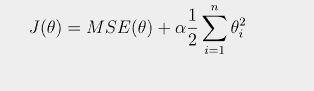 

* Lasso : Regression type that Peforms using l1 norm;set less important variables to zero
>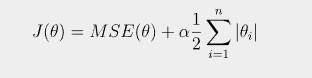

First,we need to scale the data.that is because regularized models are sensitive to the scale of features

In [10]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(x1)
x1_regularize=scaler.transform(x1)
y_regularize=scaler.transform(y)

### Ridge
Controls the high coeficients,reducing the model complexity and ovefitting.that's good when there is many indpendent variables.

You can use ***RidgeCV*** for cross_validation with regression or ***RidgeClassifierCV*** for cross_validation with Classifier.

In [25]:
from sklearn.linear_model import Ridge
#normal reg
ridge_model=Ridge(alpha=1,solver="cholesky")
ridge_model.fit(x1_regularize,y_regularize)

ridge_model.predict([[1.6]])


#sgd reg
from sklearn.linear_model import SGDRegressor
sgd_reg=SGDRegressor(penalty="l2")# with l2 norm
#which is from ridge model
sgd_reg.fit(x1_regularize,y_regularize.ravel())

sgd_reg.predict([[1.6]])


array([3.28266204])

### Lasso

Lasso uses **alpha** paran to control the degree of features on the data.

You can use the cross_validation methods for find best **alpha** parans: 
- ***Lassocv***: high-dimensional data,colinear features.
- ***LassoLars*** : Relevant values of alpha,small number of features.

In [27]:
#lasso reg
from sklearn.linear_model import Lasso

lasso_reg=Lasso(alpha=0.1)
lasso_reg.fit(x1_regularize,y_regularize)

lasso_reg.predict([[1.6]])

#sgd with l1 norm
sgd_reg_l1=SGDRegressor(penalty="l1")
sgd_reg_l1.fit(x1_regularize,y_regularize.ravel())

sgd_reg_l1.predict([[1.6]])

array([3.28295671])

### Elastic Net
Elastic Net is a mixture of Lasso and Ridge,which allows you control the regularization.
>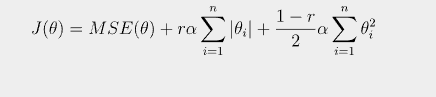
- Where r = regularization term : next to 0=Ridge,next to 1=Lasso

Using r,you can define how model works with features.

As the Lasso and Ridge,you can use the cross_validation form  for control **alpha** and **l1_ratio**: 
- ***ElasticNetCV***

In [15]:
#Elastic net
from sklearn.linear_model import ElasticNet

elastic_net_reg=ElasticNet(alpha=0.1,l1_ratio=0.5)#->ratio determines the proximity of ridge and lasso norm
elastic_net_reg.fit(x1_regularize,y_regularize)

elastic_net_reg.predict([[1.6]])

array([3.18860806])

### Early Stopping:
This is Model of training where you fit the model with small parts of data at each instances and stop training when it is stating overfit or reach the minimum validation error,being similar to Stocastic Gradient Descent.

In [ ]:
from sklearn.base import clone 
#this will copy the final model parans in a estimator,without attached data.
#you can use this with diferents dataset and even compare with other estimators

from sklearn.pipeline import Pipeline

#poly data and scalling data
early_stopping_pipeline=Pipeline([
    ("poly features",PolynomialFeatures(degree=100,include_bias=False)),
    ("scale features",StandardScaler())
])

#train set
x_train,x_test,y_train,y_test=train_test_split(x1,y,test_size=0.2)

x_train_ea=early_stopping_pipeline.fit_transform(x_train)
x_test_ea=early_stopping_pipeline.transform(x_test)

sgd_ea=SGDRegressor(max_iter=1,tol=0,warm_start=True, # no iter>1,tol because we will use training sgd mutiple times
penalty=None,learning_rate='constant',eta0=0.00055)

#metrics
best_epoch=None
best_Model=None
minimum_rmse=float('inf')

#Iterations:
for epoch in range(1000):
    sgd_ea.fit(x_train_ea,y_train)
    epoch_error=sgd_ea.predict(x_test_ea)
    error=mean_squared_error(y_test,epoch_error)

#evaluating:

    if error < minimum_rmse:
        best_epoch = epoch
        best_Model = clone(sgd_ea) # gets model parans at that train
        best_rmse = error



I did clean the cell output because there is a lot of scrach but the result is below:

In [58]:
print(best_epoch,best_Model,best_rmse)

999 SGDRegressor(eta0=0.00055, learning_rate='constant', max_iter=1, penalty=None,
             tol=0, warm_start=True) 1.651262761430079e+21
